<a href="https://colab.research.google.com/github/wd369018/Assignment/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# House rent prediction Linear Regression model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the data set
import pandas as pd

df = pd.read_csv("/content/House_Rent_Dataset.csv")
df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
#import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


In [ ]:
#read the basic information
df = pd.read_csv("/content/House_Rent_Dataset.csv")

df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
df.shape


(4746, 12)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
#summary statistics
df.describe()


,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
#missing values
df.isnull().sum()


,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


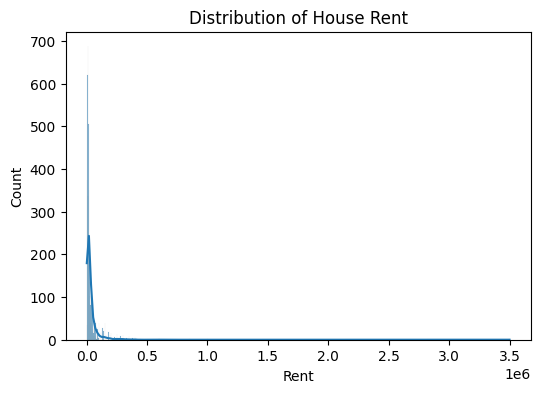

In [ ]:
#rent distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Rent'], kde=True)
plt.title("Distribution of House Rent")
plt.show()


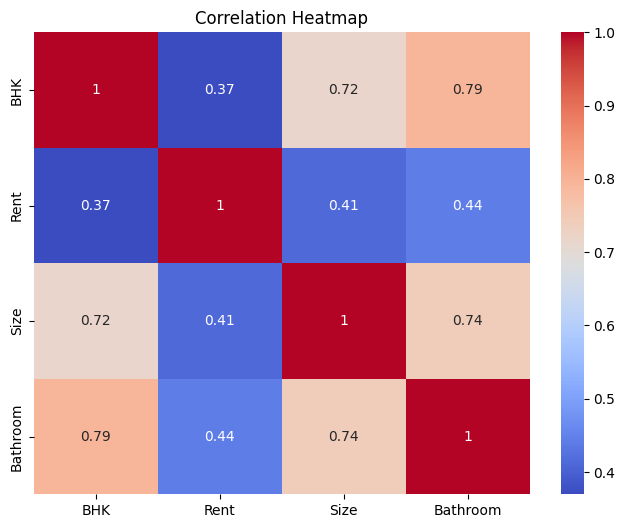

In [ ]:
#corelation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
from sklearn.linear_model import LinearRegression

X_simple = df[['Size']]
y = df['Rent']

simple_model = LinearRegression()
simple_model.fit(X_simple, y)

y_pred_simple = simple_model.predict(X_simple)


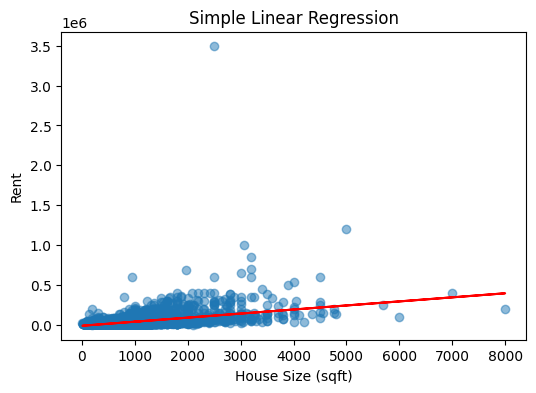

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_simple, y, alpha=0.5)
plt.plot(X_simple, y_pred_simple, color='red')
plt.xlabel("House Size (sqft)")
plt.ylabel("Rent")
plt.title("Simple Linear Regression")
plt.show()


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,BHK,Rent,Size,Bathroom,Posted On_2022-04-23,Posted On_2022-04-24,Posted On_2022-04-25,Posted On_2022-04-26,Posted On_2022-04-27,Posted On_2022-04-28,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,True
1,2,20000,800,1,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
2,2,17000,1000,1,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
3,2,10000,800,1,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,True
4,2,7500,850,1,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Rent', axis=1)
y = df_encoded['Rent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_multi)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_multi)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 15743466200.21543
RMSE: 125472.96999838423
R2 Score: -2.9503036089360175


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(df[['Size']])

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

y_pred_poly = poly_model.predict(X_poly)


In [ ]:
r2_simple = r2_score(y, y_pred_simple)
r2_poly = r2_score(y, y_pred_poly)

r2_simple, r2_poly


(0.17102422962807495, 0.17638368621272615)

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.452e+12, tolerance: 2.516e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

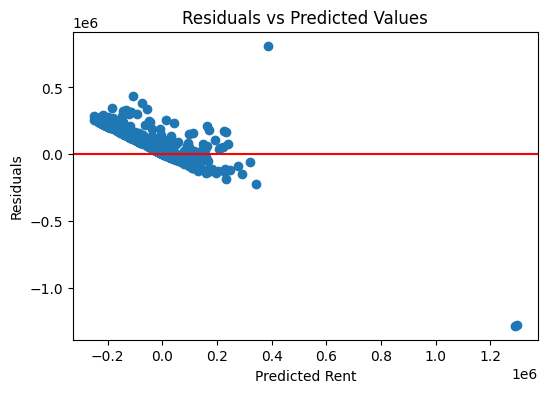

In [ ]:
residuals = y_test - y_pred_multi

plt.figure(figsize=(6,4))
plt.scatter(y_pred_multi, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Rent")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()
